In [1]:
import pandas as pd

# 데이터 로드
file_path = r"K:\SPARTA\학습자료\Python\marketing_project\target_df2.csv"
target_df2 = pd.read_csv(file_path)

# 데이터 기본 정보 확인
print("기본 정보:")
print(target_df2.info())

# 데이터 간략한 통계 확인
print("\n기술 통계:")
print(target_df2.describe())

# 결측치 확인
print("\n결측치 확인:")
print(target_df2.isnull().sum())

# 데이터 첫 5행 확인
print("\n데이터 샘플:")
print(target_df2.head())

# 데이터 타입 확인
print("\n컬럼별 데이터 타입:")
print(target_df2.dtypes)


기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66478 entries, 0 to 66477
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  66478 non-null  object 
 1   payment_type              66478 non-null  object 
 2   customer_id               66478 non-null  object 
 3   order_item_id             66478 non-null  int64  
 4   product_id                66478 non-null  object 
 5   seller_id                 66478 non-null  object 
 6   shipping_charges          66478 non-null  float64
 7   payment_installments      66478 non-null  int64  
 8   product_weight_g          66478 non-null  float64
 9   customer_zip_code_prefix  66478 non-null  int64  
 10  customer_state            66478 non-null  object 
 11  total_payment             66478 non-null  float64
 12  ppu                       66478 non-null  float64
 13  volume                    66478 non-null  float64
 14 

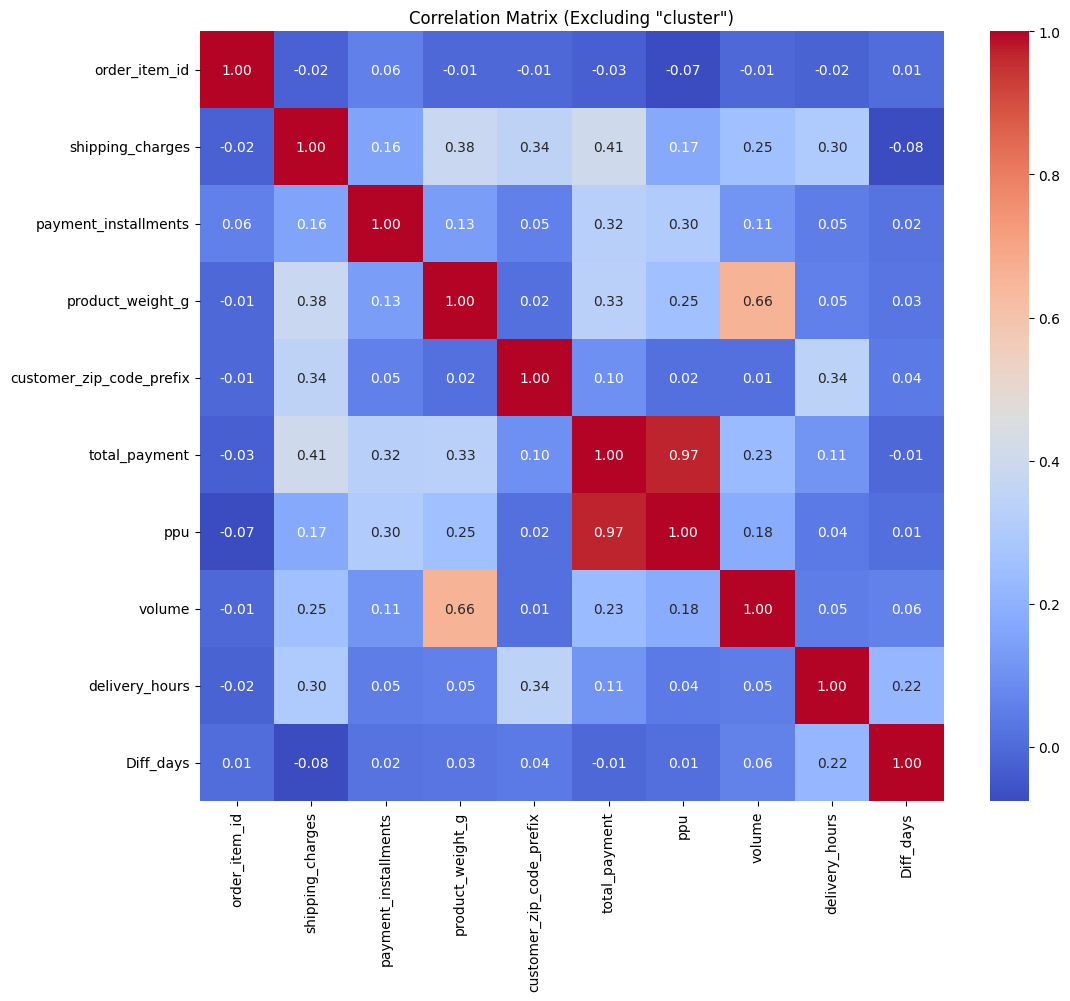

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'Clust' 칼럼 제외
df_without_clust = target_df2.drop(columns=['cluster'], errors='ignore')

# 수치형 컬럼만 선택 (상관계수는 수치형 데이터만 의미 있음)
numeric_df = df_without_clust.select_dtypes(include=['float64', 'int64'])

# 상관계수 계산
correlation_matrix = numeric_df.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix (Excluding "cluster")')
plt.show()


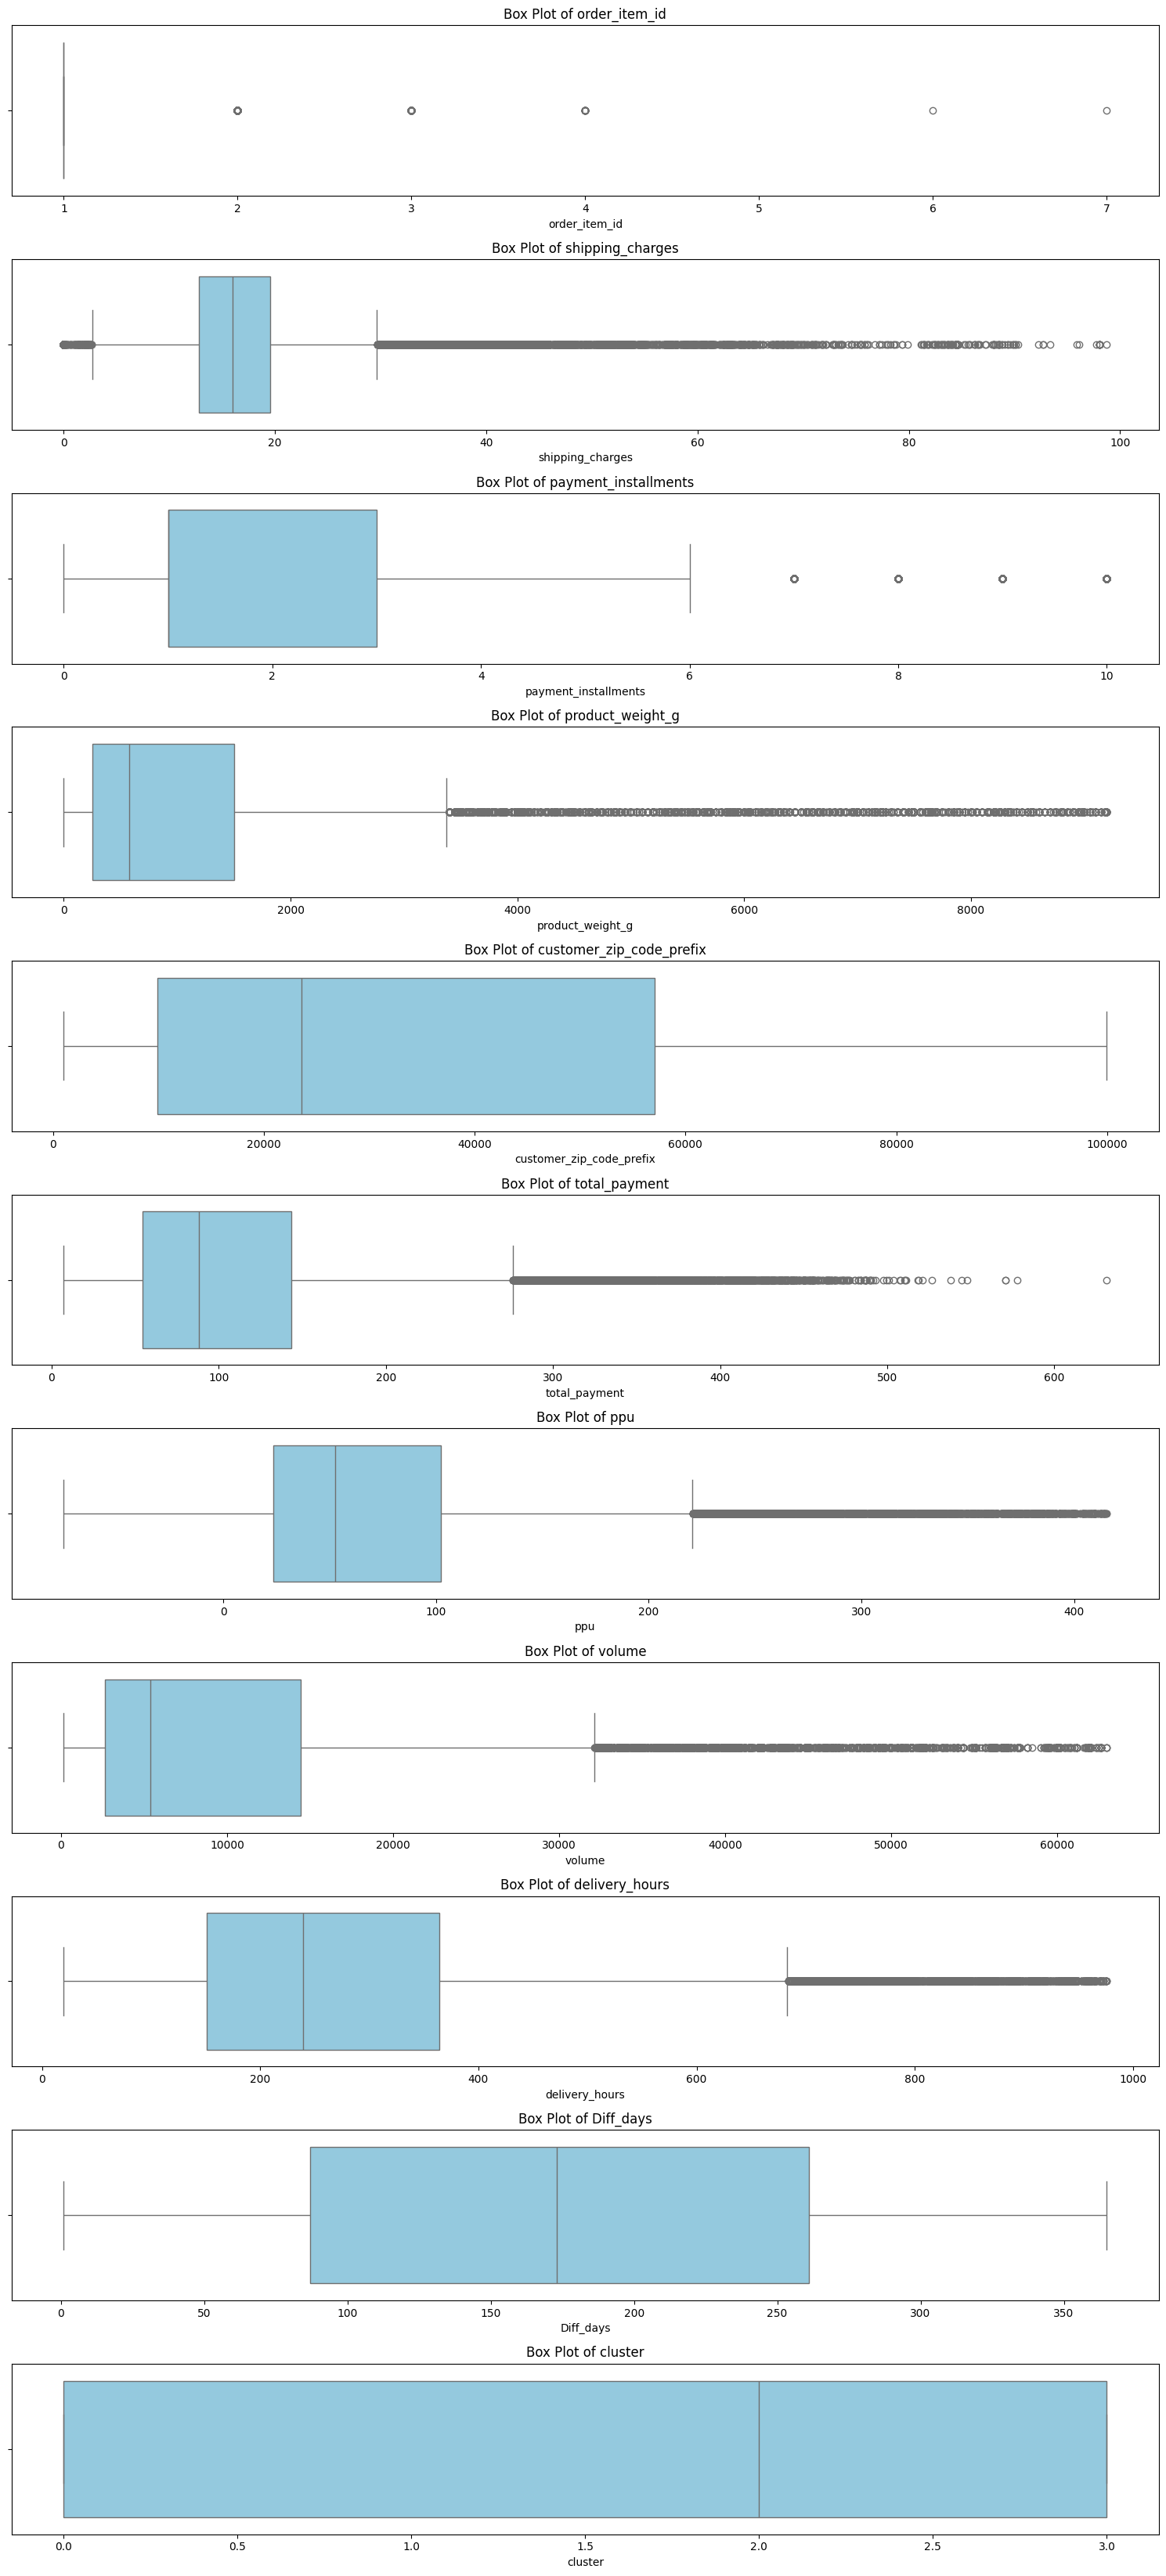

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 컬럼만 선택
numeric_columns = target_df2.select_dtypes(include=['float64', 'int64']).columns

# 박스 플롯 시각화
plt.figure(figsize=(15, len(numeric_columns) * 3))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(x=target_df2[column], color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


C:\Users\조성용\AppData\Local\Temp\ipykernel_19120\1251375928.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Variable", y="Value", data=selected_melted, palette="Set3")


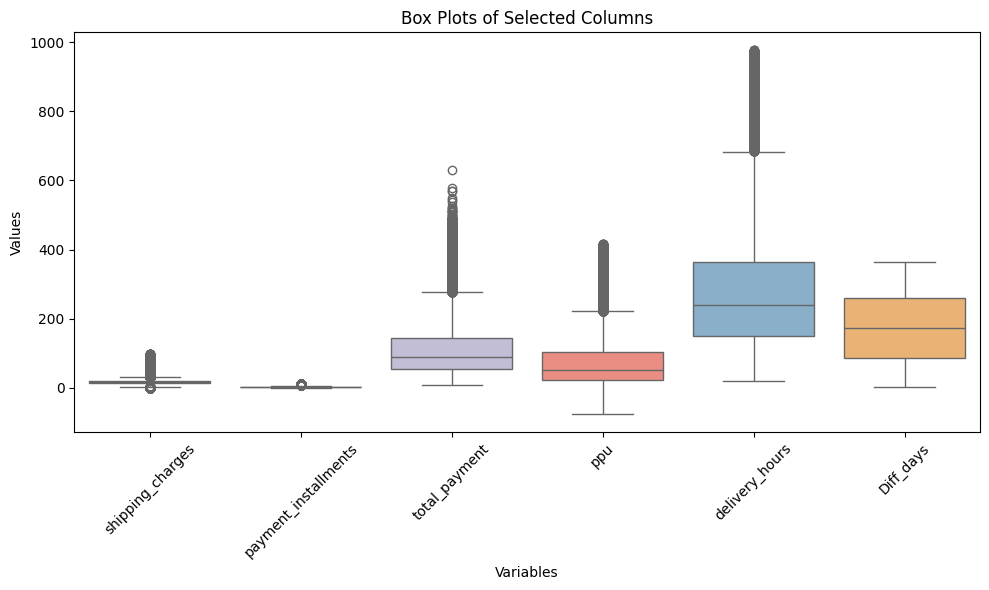

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 관심 있는 컬럼 선택
columns_of_interest = [
    "shipping_charges",
    "payment_installments",
    "total_payment",
    "ppu",
    "delivery_hours",
    "Diff_days",
]
selected_columns = target_df2[columns_of_interest]

# 데이터프레임을 길게 변환 (long format)
selected_melted = selected_columns.melt(var_name="Variable", value_name="Value")

# 박스 플롯 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x="Variable", y="Value", data=selected_melted, palette="Set3")
plt.title("Box Plots of Selected Columns")
plt.xlabel("Variables")
plt.ylabel("Values")
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()
plt.show()


In [11]:
# 수치형 컬럼만 선택
numeric_columns = target_df2.select_dtypes(include=['number']).columns

# 클러스터별 평균 계산
cluster_means = target_df2.groupby('cluster')[numeric_columns].mean()

print(cluster_means)



         order_item_id  shipping_charges  payment_installments  \
cluster                                                          
0.0           1.016132         17.036354              2.490681   
1.0           1.010497         25.671659              3.349690   
2.0           1.017612         17.214167              2.676382   
3.0           1.017198         15.937072              2.372101   

         product_weight_g  customer_zip_code_prefix  total_payment  \
cluster                                                              
0.0            804.816032              30546.054960     102.852395   
1.0           4970.661060              36165.203870     179.260731   
2.0            874.643184              38669.279665     105.155067   
3.0            656.491504              33476.832309      93.939272   

                ppu        volume  delivery_hours   Diff_days  cluster  
cluster                                                                 
0.0       68.367086   7506.056112   

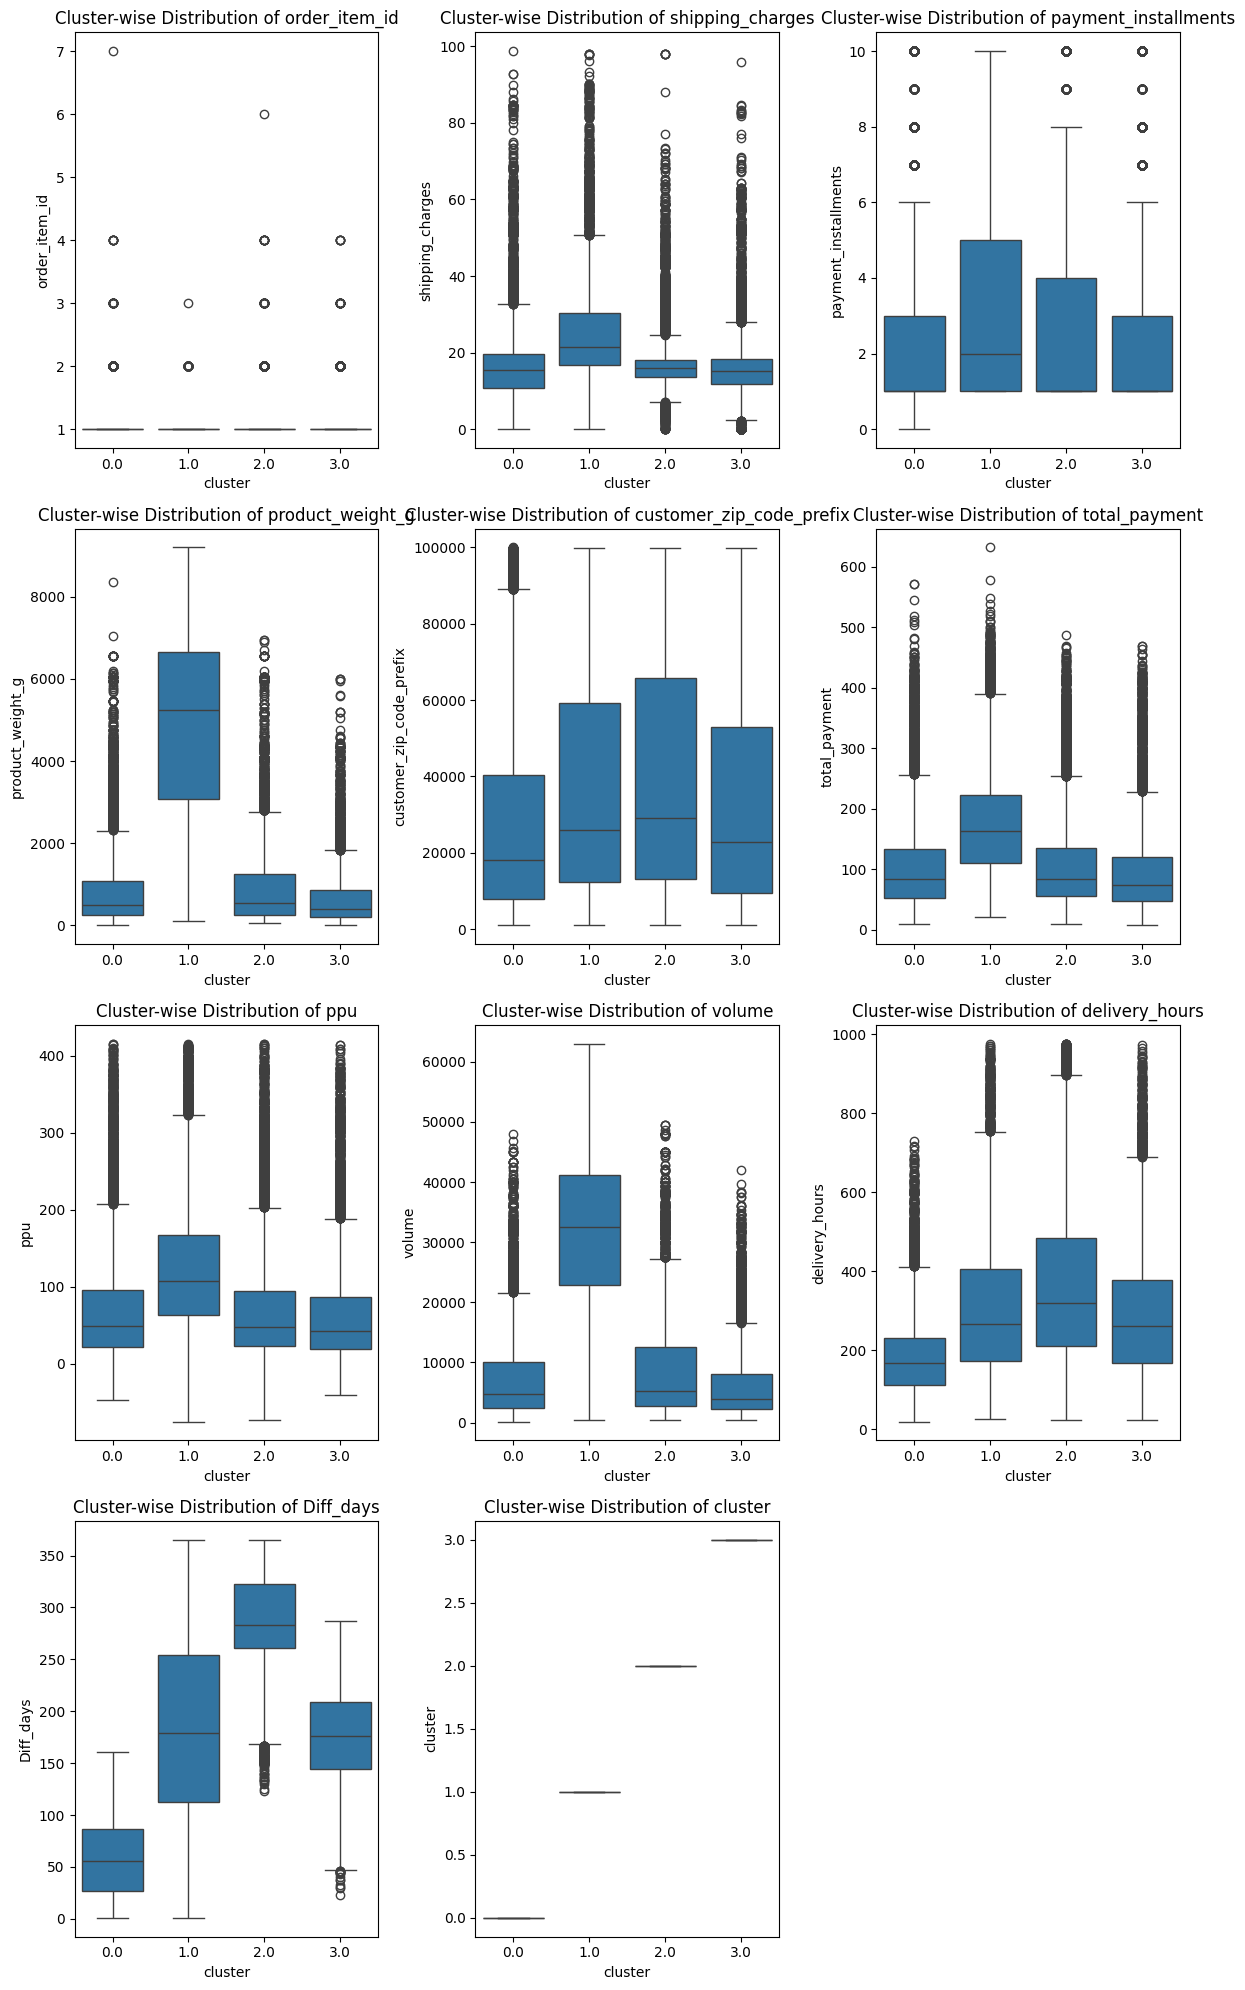

In [13]:
# 수치형 컬럼만 선택
numeric_columns = target_df2.select_dtypes(include=['number']).columns

# 그래프의 행과 열 수 동적으로 계산
rows = (len(numeric_columns) // 3) + (1 if len(numeric_columns) % 3 != 0 else 0)
cols = 3

# 클러스터별 분포를 박스 플롯으로 시각화
plt.figure(figsize=(12, rows * 5))  # 세로 크기도 동적으로 설정
for idx, col in enumerate(numeric_columns, 1):
    plt.subplot(rows, cols, idx)
    sns.boxplot(x='cluster', y=col, data=target_df2)
    plt.title(f'Cluster-wise Distribution of {col}')
    plt.tight_layout()

plt.show()



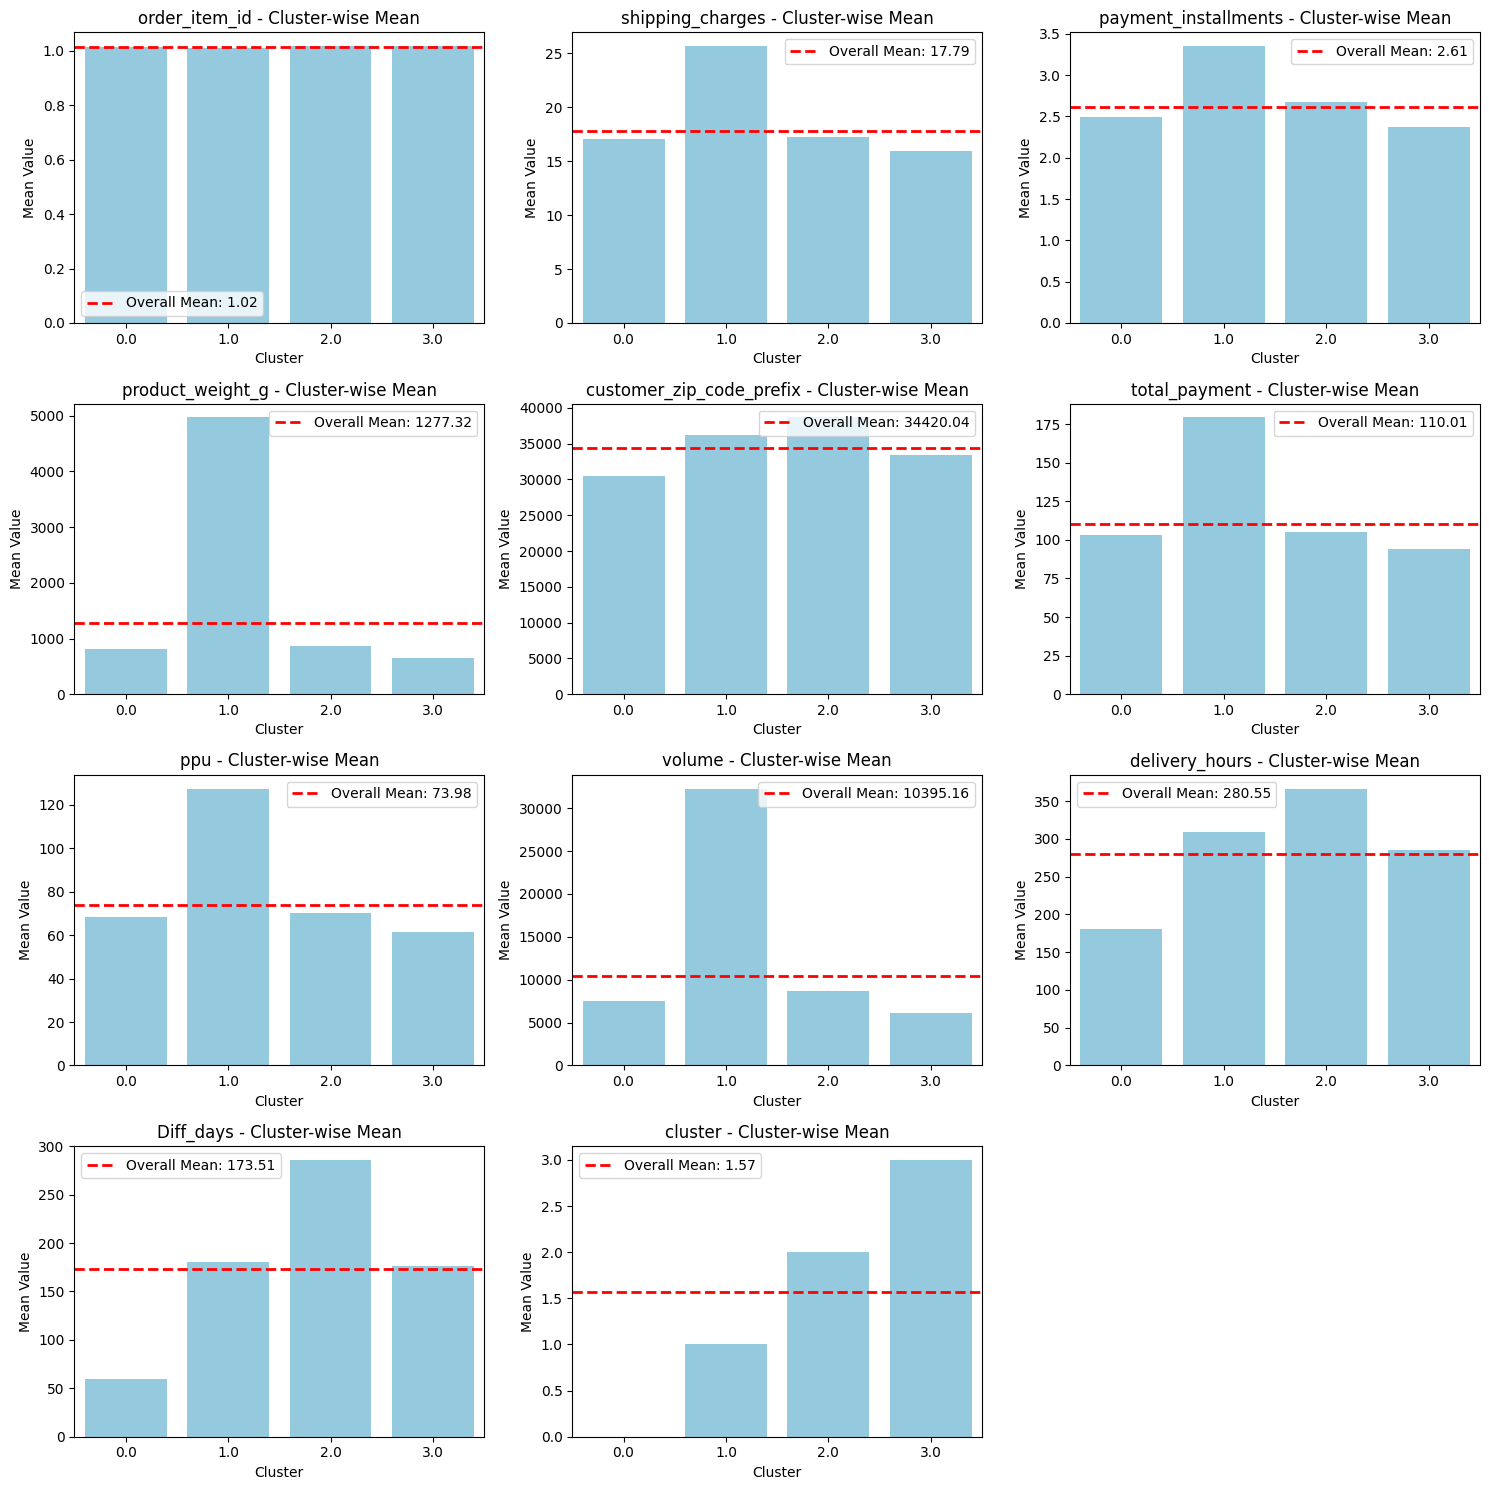

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 수치형 컬럼만 선택
numeric_columns = target_df2.select_dtypes(include=['float64', 'int64']).columns

# 전체 평균 계산
overall_means = target_df2[numeric_columns].mean()

# 시각화
plt.figure(figsize=(15, 15))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)  # 3열 레이아웃
    
    # 클러스터별 평균 계산
    cluster_means = target_df2.groupby('cluster')[column].mean()

    # 막대 그래프 그리기
    sns.barplot(x=cluster_means.index, y=cluster_means.values, color='skyblue')

    # 전체 평균을 가로선으로 표시
    plt.axhline(overall_means[column], color='red', linestyle='dashed', linewidth=2, label=f'Overall Mean: {overall_means[column]:.2f}')
    
    # 제목, 축 레이블, 범례 추가
    plt.title(f'{column} - Cluster-wise Mean')
    plt.xlabel('Cluster')
    plt.ylabel('Mean Value')
    plt.legend()

plt.tight_layout()
plt.show()



클러스터 3의 카테고리 값들:
['fashion_beauty' 'toys' 'arts_hobbies' 'electronics' 'others' 'furniture'
 'home_appliances' 'baby_products' 'security' 'food' 'construction'
 'industry']


C:\Users\조성용\AppData\Local\Temp\ipykernel_19120\609946324.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=cluster_3_data, palette='viridis')


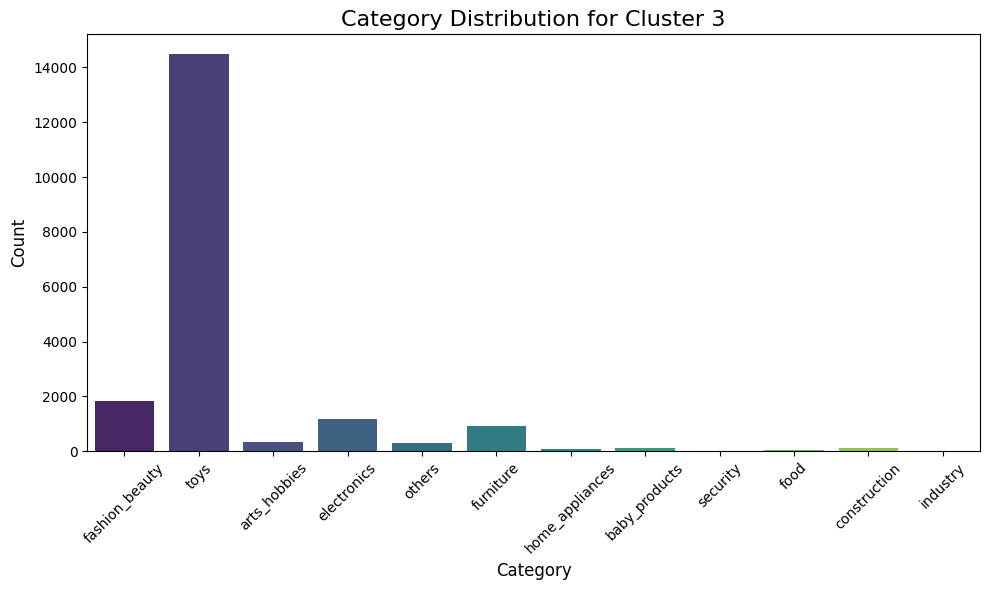

In [19]:
# 클러스터가 3인 데이터 필터링
cluster_3_data = target_df2[target_df2['cluster'] == 3]

# 'category' 컬럼의 고유값 확인
category_values_cluster_3 = cluster_3_data['category'].unique()

# 결과 출력
print("클러스터 3의 카테고리 값들:")
print(category_values_cluster_3)

# 클러스터가 3인 데이터 필터링
cluster_3_data = target_df2[target_df2['cluster'] == 3]

# 카테고리 값들의 분포를 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=cluster_3_data, palette='viridis')

# 그래프 제목과 레이블 설정
plt.title('Category Distribution for Cluster 3', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

# 그래프 보여주기
plt.xticks(rotation=45)  # x축 라벨 회전
plt.tight_layout()
plt.show()

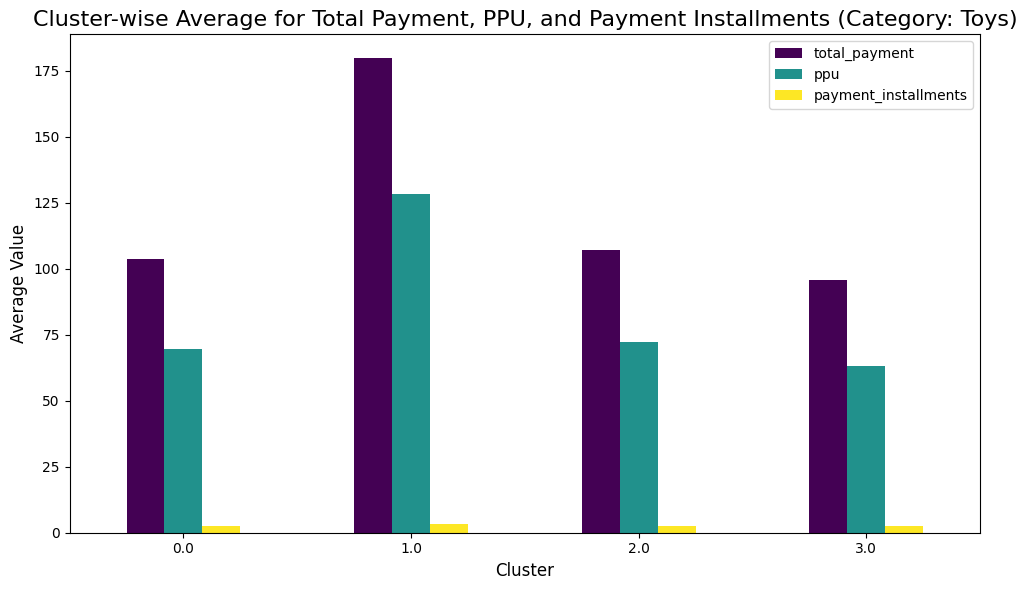

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'category'가 'toys'인 데이터 필터링
toys_data = target_df2[target_df2['category'] == 'toys']

# 클러스터별로 'total_payment', 'ppu', 'payment_installments'의 평균 계산
mean_values = toys_data.groupby('cluster')[['total_payment', 'ppu', 'payment_installments']].mean()

# 데이터 시각화
mean_values.plot(kind='bar', figsize=(10, 6), colormap='viridis')

# 그래프 제목과 레이블 설정
plt.title('Cluster-wise Average for Total Payment, PPU, and Payment Installments (Category: Toys)', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Average Value', fontsize=12)

# 그래프 표시
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [3]:
# 각 클러스터별 중복 없는 'customer_id' 수 계산
unique_customer_count_per_cluster = target_df2.groupby('cluster')['customer_id'].nunique()

# 결과 출력
print("각 클러스터별 중복 없는 customer_id 수:")
print(unique_customer_count_per_cluster)



각 클러스터별 중복 없는 customer_id 수:
cluster
0.0    19714
1.0     7854
2.0    18889
3.0    19052
Name: customer_id, dtype: int64


Text(0, 0.5, 'Unique Customer Count')

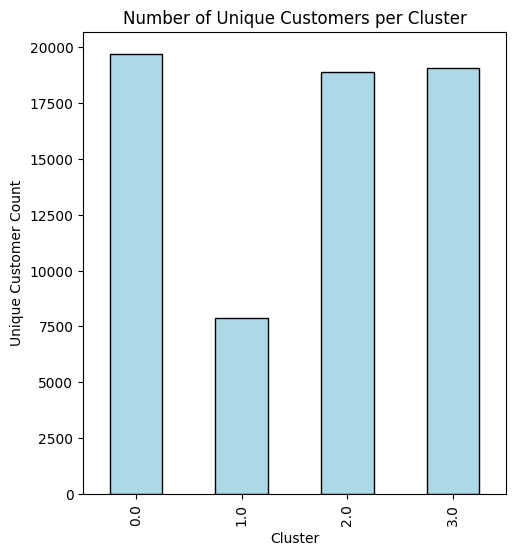

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 각 클러스터별 중복 없는 'customer_id' 수 계산
unique_customer_count_per_cluster = target_df2.groupby('cluster')['customer_id'].nunique()

# 전체 클러스터에 대한 customer_id의 분포도 시각화
plt.figure(figsize=(12, 6))

# 막대 차트: 클러스터별 중복 없는 customer_id 수
plt.subplot(1, 2, 1)
unique_customer_count_per_cluster.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Number of Unique Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Unique Customer Count')

각 클러스터별 고객의 주문 횟수:
cluster
0.0    19960
1.0     7907
2.0    19248
3.0    19363
Name: order_id, dtype: int64


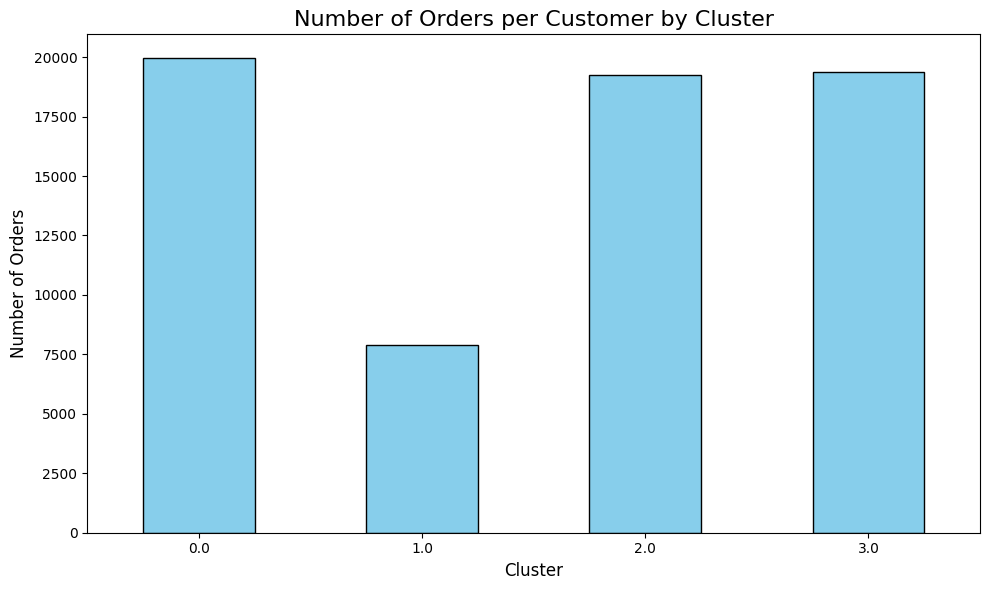

In [24]:
# 'order_id'의 중복을 제거하여 각 고객의 주문 횟수 계산
customer_order_count = target_df2.drop_duplicates(subset=['customer_id', 'order_id'])

# 클러스터별로 고객의 주문 횟수 계산
cluster_order_counts = customer_order_count.groupby('cluster')['order_id'].count()

# 결과 출력
print("각 클러스터별 고객의 주문 횟수:")
print(cluster_order_counts)

# 시각화 (클러스터별 주문 횟수)
cluster_order_counts.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')

# 그래프 제목과 레이블 설정
plt.title('Number of Orders per Customer by Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

# 그래프 표시
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
